#Logistic Regression

載入套件

In [12]:
%matplotlib inline  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

訓練資料：x_data, y_data。畫圖用：x_grid

In [13]:

x_data=[-1.        , -0.93103448, -0.86206897, -0.79310345, -0.74413793, -0.72517241, 
           -0.6862069 , -0.65724138, -0.64827586, -0.57931034, -0.51034483, -0.44137931,
           -0.47241379, -0.35344828, -0.20148276,  0.03448276,  0.05344828,  0.37241379,
           0.39137931,  0.41034483,  0.44931034,  0.49827586,  0.51724138,  0.5862069 ,
           0.67517241,  0.72413793,  0.84310345,  0.86206897,  0.93103448,  1.        , ]

x_grid=[-1.        , -0.93103448, -0.86206897, -0.79310345, -0.72413793, -0.65517241,
           -0.5862069 , -0.51724138, -0.44827586, -0.37931034, -0.31034483, -0.24137931,
           -0.17241379, -0.10344828, -0.03448276,  0.03448276,  0.10344828,  0.17241379,
           0.24137931,  0.31034483,  0.37931034,  0.44827586,  0.51724138,  0.5862069 ,
           0.65517241,  0.72413793,  0.79310345,  0.86206897,  0.93103448,  1.        , ]

y_data=[0, 0 , 0, 0, 0,
          0, 0, 0,  0,  0,
          0, 0, 0,  0,  0,
          1, 1, 1,  1,  1,
          1, 1, 1,  1,  1,
          1, 1, 1,  1,  1]

畫訓練資料

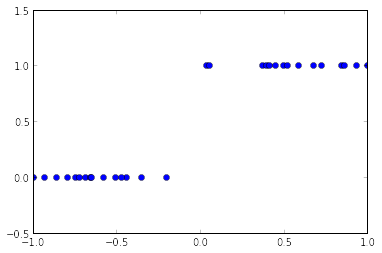

In [14]:
def plot_point():
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data, 'bo' )
    ax.set_xlim((-1, 1))
    ax.set_ylim((-0.5, 1.5))

plot_point()

畫模型

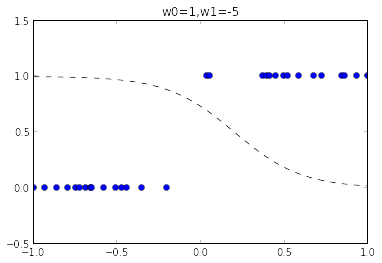

In [15]:
def sigmoid(x):
    return 1./(1.+math.e**(-1*x))

def plot_model( w0,w1):
    h_model = [sigmoid(w0+w1*x) for x in x_grid]
    fig, ax = plt.subplots()
    ax.plot(x_grid , h_model, 'k--')
    ax.plot(x_data, y_data, 'bo' )
    ax.set_xlim((-1, 1)) 
    ax.set_ylim((-0.5, 1.5)) 
    ax.set_title("w0=%s,w1=%s"%(w0,w1))
    
plot_model(1,-5)

梯度下降

In [16]:
def avg(x):
    sum(s)/float(len(s))

def gradient_descent(w0,w1,eta = 0.5):
    h_x = [sigmoid(w0+w1*x) for x in x_data]
    w0 -= eta*sum( map(lambda hx,y: hx-y ,h_x, y_data) )/len(y_data)                                        
    w1 -= eta*sum( map(lambda hx,y,x: (hx-y)*x ,h_x, y_data,x_data) )/len(y_data)
    return w0,w1

gradient_descent(1,-5)

(0.9532603173035678, -4.719248100399851)

畫Error function

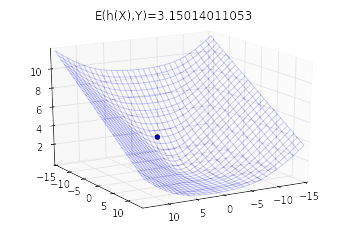

In [17]:
import numpy as np

def npsigmoid(x):
    return np.divide(1,1+np.exp(-1* x ) )

def plot_cost(w0,w1):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(elev=20., azim=60)
    W0,W1= np.mgrid[-15:15:1, -15:15:1]
    Z = np.zeros(W0.shape)
    point = 0.0
    for x,y in zip(x_data,y_data):
      point -= y*math.log(sigmoid(w0+w1*x))+(1-y)*math.log(1-sigmoid(w0+w1*x))
      Z -= y*np.log(npsigmoid(W0+W1*x))+(1-y)*np.log(1-npsigmoid(W0+W1*x))
    point = point/len(x_data)                                                                          
    Z = np.divide(Z,len(x_data))
    surf = ax.plot_wireframe(W0, W1, Z, cstride=1, rstride=1, alpha=0.3)
    ax.scatter([w0], [w1], [point] ,'ro' )
    ax.set_title("E(h(X),Y)=%s"%(point))
    
plot_cost(1,-5)

Logisti Regression訓練函數

0.953260317304 -4.7192481004
0.0535130210531 1.16711484681
0.124337875551 2.92846785673
0.200204878455 3.84111876464
0.261996905413 4.46866606077
0.314082587617 4.95267721602
0.359316206007 5.34983698305
0.399439561717 5.68859072693
0.435580777659 5.9852669053
0.468514523136 6.25011992225


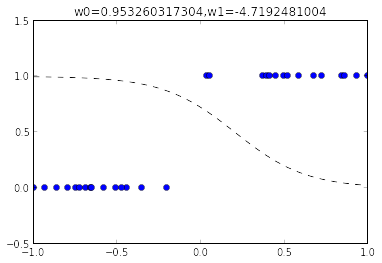

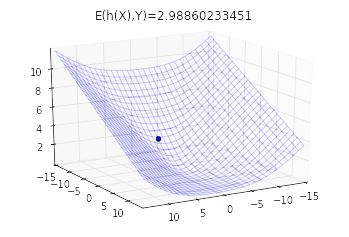

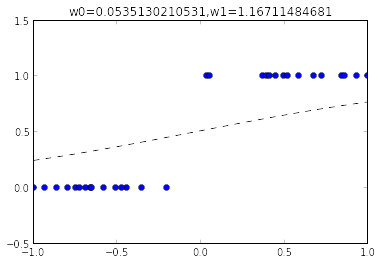

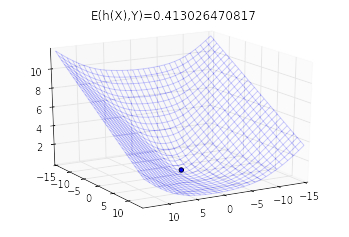

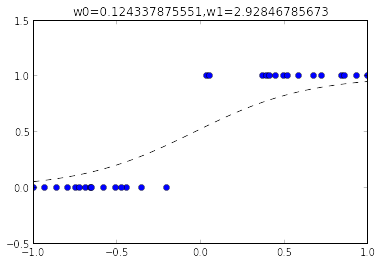

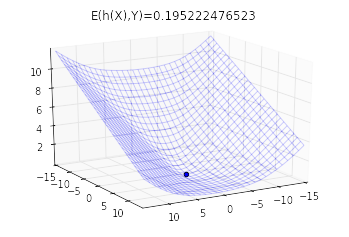

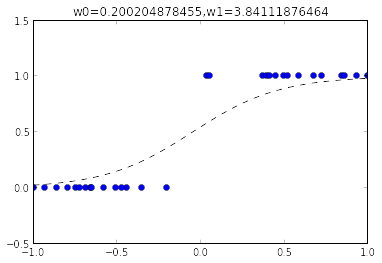

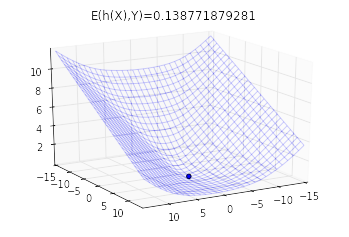

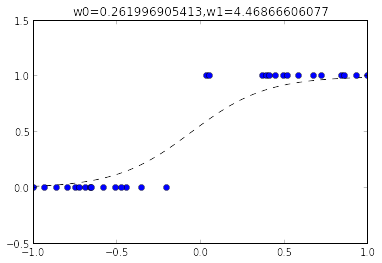

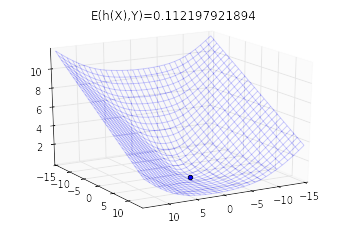

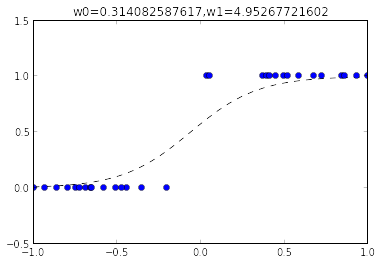

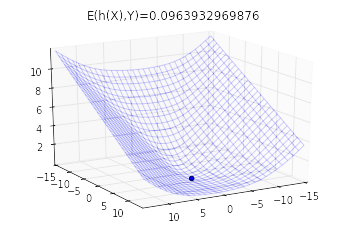

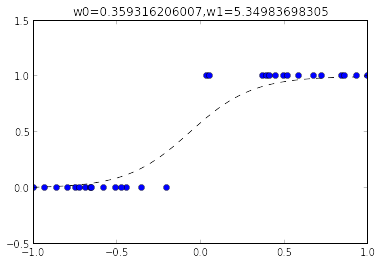

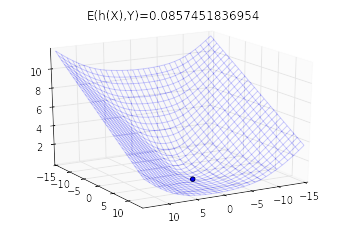

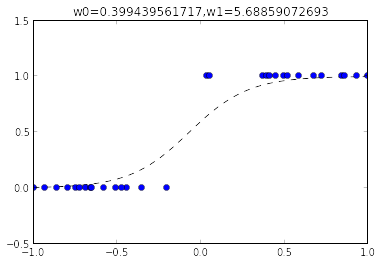

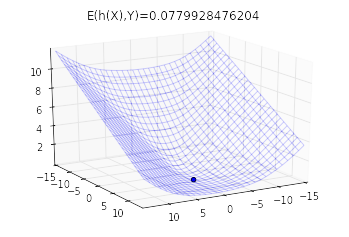

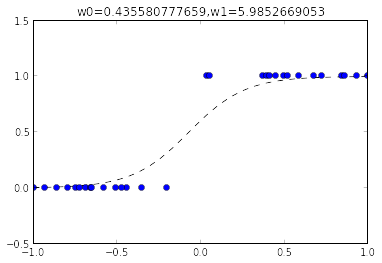

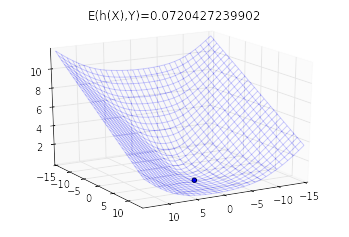

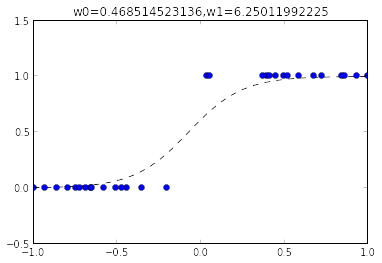

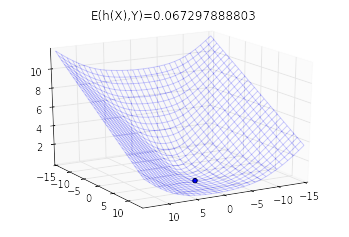

In [18]:
def logistic_regression():
    w0 = 1
    w1 = -5
    for i in range(300):
        w0,w1 = gradient_descent(w0,w1)
        if i%30==0:
            print w0,w1
            plot_model(w0,w1)
            plot_cost(w0,w1)
logistic_regression()